# Stochastic Differential Equations

## Simulating Brownian Motion

First, we want to estimate the density of a single Brownian path using Monte Carlo. We will formulate this problem as follows:

1. First, we define the Brownian update using the Euler-Murayama scheme.

In [8]:
from numpy import sqrt
from numpy.random import normal

def euler_murayama_update (
    position,           # u, float
    forcing_term,       # a, callable
    timestep,           # n, int
    timescale,          # dt, float
    chaos=1.            # used to dampen or strengthen Brownian term
):
    return position + forcing_term(timestep * timescale, position) * timescale + chaos * normal(loc=0., scale=sqrt(timescale), size=position.shape)

2. Second, we define the Brownian path by applying the EM scheme over $k$ timesteps with no forcing term:

In [9]:
from numpy import linspace, zeros

def simulate_brownian_paths (
    num_paths,
    timescale=1e-3  # EM update timescale
):
    # Define useful state
    endtime = 1.
    position = zeros(num_paths) # dirac delta
    forcing_term = lambda time, position: 0 # Pure brownian motion, so no forcing term
    timesteps = int(endtime / timescale)
    # Perform EM updates
    for timestep in range(timesteps):
        position = euler_murayama_update(position, forcing_term, timestep, timescale)
    # Return
    return position

3. We compute the distribution of paths using Monte-Carlo:

Text(0.5, 1.0, 'Histogram of paths')

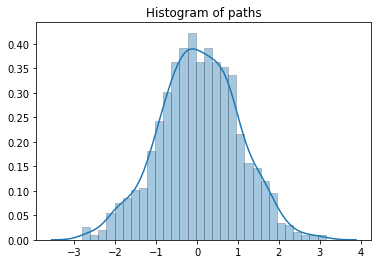

In [18]:
%matplotlib inline

from seaborn import distplot

# Compute paths
paths = simulate_brownian_paths(num_paths=1000, timescale=1e-3)

# Plot histogram
distplot(paths, bins=30, kde=True, hist_kws={ "alpha":.4, "edgecolor": "black", "linewidth":.5 }).set_title("Histogram of paths")

Now, we compute the probability of a brownian path ending up within $[-1., 1.]$

In [19]:
# Check paths which are in range
num_in_range = ((paths >= -1.) & (paths <= 1.)).sum()
print(f"The probability of the paths ending in [-1., 1.] is {num_in_range / paths.size:.3f}")

The probability of the paths ending in [-1., 1.] is 0.697


## Simulating Forces with Brownian Motion

We will simulate the following system:
$$ du = -\frac{1}{2} u (1 - u^2) dt + \frac{1}{10} dw $$

This corresponds to the following:

In [13]:
def simulate_force_path (
    initial_position,   # initial path positions
    timescale=1e-3      # EM update timescale
):
    # Define useful state
    endtime = 1.
    position = initial_position
    forcing_term = lambda time, position: -0.5 * position * (1 - position ** 2)
    timesteps = int(endtime / timescale)
    # Perform EM updates
    for timestep in range(timesteps):
        position = euler_murayama_update(position, forcing_term, timestep, timescale, chaos=0.1)
    # Return
    return position

We will estimate the density when the initial density is $\delta(x)$ and when $x \sim \mathcal{N}(-0.1, -0.1^2)$

Text(0.5, 1.0, 'Normal-initialized paths')

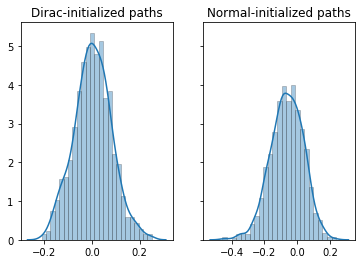

In [22]:
# Good number of paths
NUM_PATHS = 1000

# Define initial positions
dirac_initials = zeros(NUM_PATHS)
normal_initials = normal(loc=-0.1, scale=0.1, size=NUM_PATHS)

# Estimate with the above seed functions
paths_dirac_initial = simulate_force_path(dirac_initials, timescale=1e-3)
paths_normal_initial = simulate_force_path(normal_initials, timescale=1e-3)

# Plot densities
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
distplot(paths_dirac_initial, bins=25, kde=True, ax=ax1, hist_kws={ "alpha":.4, "edgecolor": "black", "linewidth":.5 }).set_title("Dirac-initialized paths")
distplot(paths_normal_initial, bins=25, kde=True, ax=ax2, hist_kws={ "alpha":.4, "edgecolor": "black", "linewidth":.5 }).set_title("Normal-initialized paths")

## Fokker-Planck Derivation
**INCOMPLETE**